In [90]:
# import dependencies
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)
from pathlib import Path
import seaborn as sns

import plotly as py
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import plotly.io as pio
import plotly.offline as pyo
import hvplot.pandas
from plotly.subplots import make_subplots
from plotly.offline import plot

import datetime
import calendar

pio.templates.default = "plotly_dark"
sns.set_theme(style='darkgrid', palette='colorblind')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings("ignore")

In [91]:
# Read csv
df = pd.read_csv('Resources/new_global_data.csv')
df.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude,Continent
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953,AS
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953,AS
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953,AS
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953,AS
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953,AS


In [92]:
df.columns

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density\n(P/Km2)', 'Land Area(Km2)', 'Latitude',
       'Longitude', 'Continent'],
      dtype='object')

In [93]:
df.dtypes

Entity                                                               object
Year                                                                  int64
Access to electricity (% of population)                             float64
Access to clean fuels for cooking                                   float64
Renewable-electricity-generating-capacity-per-capita                float64
Financial flows to developing countries (US $)                      float64
Renewable energy share in the total final energy consumption (%)    float64
Electricity from fossil fuels (TWh)                                 float64
Electricity from nuclear (TWh)                                      float64
Electricity from renewables (TWh)                                   float64
Low-carbon electricity (% electricity)                              float64
Primary energy consumption per capita (kWh/person)                  float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         float64
Value_co2_em

In [94]:
df.describe()

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude
count,3649.000000,3639.000000,3480.000000,2718.000000,1.560000e+03,3455.000000,3628.000000,3523.000000,3628.000000,3607.000000,3649.000000,3442.000000,3.221000e+03,1512.000000,3332.000000,3367.000000,3.648000e+03,3648.000000,3648.000000
mean,2010.038367,78.933702,63.255287,113.137498,9.422400e+07,32.638165,70.365003,13.450190,23.968010,36.801182,25743.981745,5.307345,1.598665e+05,11.986707,3.441610,13283.774348,6.332135e+05,18.246388,14.822695
std,6.054228,30.275541,39.043658,244.167256,2.981544e+08,29.894901,348.051866,73.006623,104.431085,34.314884,34773.221366,3.532020,7.736611e+05,14.994644,5.686720,19709.866716,1.585519e+06,24.159232,66.348148
min,2000.000000,1.252269,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110000,1.000000e+01,0.000000,-62.075920,111.927225,2.100000e+01,-40.900557,-175.198242
25%,2005.000000,59.800890,23.175000,3.540000,2.600000e+05,6.515000,0.290000,0.000000,0.040000,2.877847,3116.737300,3.170000,2.020000e+03,2.137095,1.383302,1337.813437,2.571300e+04,3.202778,-11.779889
50%,2010.000000,98.361570,83.150000,32.910000,5.665000e+06,23.300000,2.970000,0.000000,1.470000,27.865068,13120.570000,4.300000,1.050000e+04,6.290766,3.559855,4578.633208,1.176000e+05,17.189877,19.145136
75%,2015.000000,100.000000,100.000000,112.210000,5.534750e+07,55.245000,26.837500,0.000000,9.600000,64.403792,33892.780000,6.027500,6.058000e+04,16.841638,5.830099,15768.615365,5.131200e+05,38.969719,46.199616
max,2020.000000,100.000000,100.000000,3060.190000,5.202310e+09,96.040000,5184.130000,809.410000,2184.940000,100.000010,262585.700000,32.570000,1.070722e+07,86.836586,123.139555,123514.196700,9.984670e+06,64.963051,178.065032


In [95]:
df.nunique()

Entity                                                               176
Year                                                                  21
Access to electricity (% of population)                             2040
Access to clean fuels for cooking                                    896
Renewable-electricity-generating-capacity-per-capita                2110
Financial flows to developing countries (US $)                      1017
Renewable energy share in the total final energy consumption (%)    2587
Electricity from fossil fuels (TWh)                                 1859
Electricity from nuclear (TWh)                                       547
Electricity from renewables (TWh)                                   1533
Low-carbon electricity (% electricity)                              2647
Primary energy consumption per capita (kWh/person)                  3628
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         1044
Value_co2_emissions_kt_by_country                  

In [96]:
df["Year"].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
      dtype=int64)

In [97]:
len(df["Entity"].unique())

176

In [98]:
#count of null values
df.isna().sum()

Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_kt_by_country                  

In [101]:
import plotly.express as px

# Rename columns
df.rename(columns={"Value_co2_emissions_kt_by_country": "CO2", 'Land Area(Km2)': 'Land'}, inplace=True)

# Select and clean data
energy_land = df[['Entity', 'Land']]
energy_land = energy_land.dropna()

# Sort the data by 'Land' in descending order
energy_land = energy_land.sort_values(by='Land', ascending=False)

# Create the plot
fig = px.bar(
    energy_land,
    x='Entity',
    y='Land',
    labels={'Land': 'Land Area - km2', 'Entity': 'Country'}
)

# Update graph layout/styles
fig.update_layout(
    title={'text': 'Countries Land Area - in km2', 'x': 0.5}
)

# Show the graph
fig.show()


In [110]:
energy_land.to_csv(r'C:\Users\Hieu Luu\Desktop\Project 4\project_4\Resources\Country_land', index=False, header=True)

In [102]:
# Finding duplicate rows
duplicate_rows = df[df.duplicated(keep='first')]

# Number of duplicate rows
num_duplicates = duplicate_rows.shape[0]

# Displaying the duplicate rows
print(f"Number of duplicate rows: {num_duplicates}")
duplicate_rows

Number of duplicate rows: 0


,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),CO2,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land,Latitude,Longitude,Continent


<Axes: >

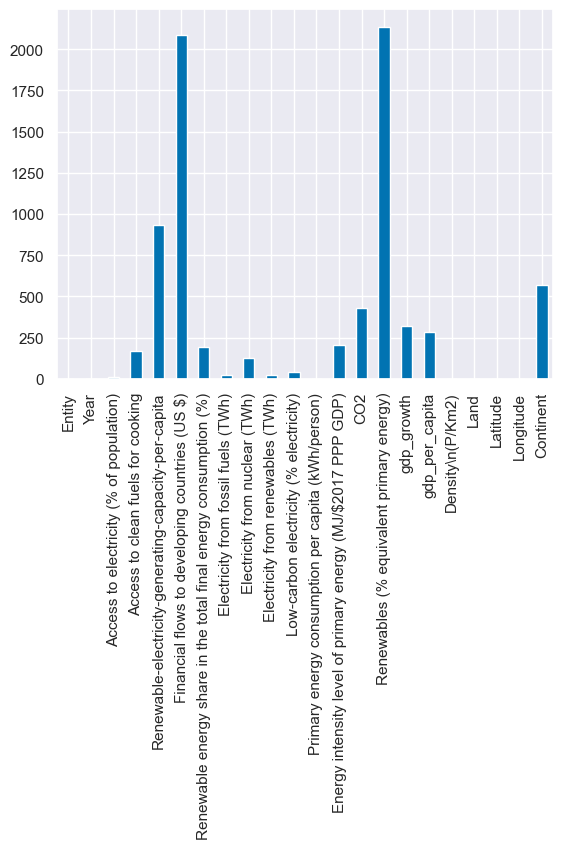

In [103]:
#bar chart of null values
df.isna().sum().plot(kind = 'bar')

In [107]:
co2_data = df[['Entity', 'Year', 'CO2']]#create new data 
co2_data.head()

,Entity,Year,CO2
0,Afghanistan,2000,760.000000
1,Afghanistan,2001,730.000000
2,Afghanistan,2002,1029.999971
3,Afghanistan,2003,1220.000029
4,Afghanistan,2004,1029.999971


In [108]:
# Canada DataFrame with dropped missing values
co2_data_japan = co2_data[(co2_data['Entity'] == 'Japan')].dropna()
# United States DataFrame with dropped missing values
co2_data_united_states = co2_data[(co2_data['Entity'] == 'United States')].dropna()
# China DataFrame with dropped missing values
co2_data_china = co2_data[(co2_data['Entity'] == 'China')].dropna()
# Japan DataFrame with dropped missing values
co2_data_india = co2_data[(co2_data['Entity'] == 'India')].dropna()

In [111]:
co2_data.to_csv(r'C:\Users\Hieu Luu\Desktop\Project 4\project_4\Resources\World_co2', index=False, header=True)

In [124]:
# Import important packages from plotly
from plotly.subplots import make_subplots
import plotly.graph_objs as go

# Creates the subplot for the 4 graphs
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Japan', 'United States', 'China', 'India')
)

# Adds the 3 graphs into the subplot
fig.add_trace(go.Bar(x=co2_data_japan['Year'], y=co2_data_japan['CO2']), row=1, col=1)
fig.add_trace(go.Bar(x=co2_data_united_states['Year'], y=co2_data_united_states['CO2']), row=1, col=2)
fig.add_trace(go.Bar(x=co2_data_china['Year'], y=co2_data_china['CO2']), row=2, col=1)
fig.add_trace(go.Bar(x=co2_data_india['Year'], y=co2_data_india['CO2']), row=2, col=2)

# Updates subplot layout
fig.update_layout(
    height=600, width=1000,
    showlegend=False,
    title={'text': 'CO2 emission - in kiloton - by the three biggest countries in the world, per year', 'x': 0.5}
)

# Shows subplot
fig.show()


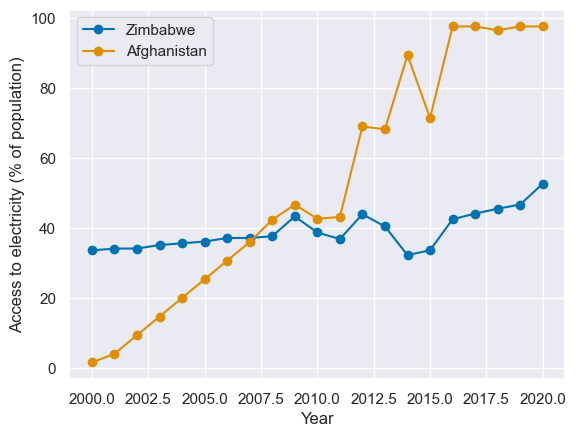

In [104]:
temp_df=df[df["Entity"]=="Zimbabwe"]
plt.plot(temp_df["Year"],temp_df["Access to electricity (% of population)"],marker='o',label="Zimbabwe")
plt.xlabel("Year")
plt.ylabel("Access to electricity (% of population)")
temp_df=df[df["Entity"]=="Afghanistan"]
plt.plot(temp_df["Year"],temp_df["Access to electricity (% of population)"],marker='o',label="Afghanistan")
plt.legend()

In [105]:
# Function to plot features on world map
def plot_world_map(column_name):
    fig = go.Figure()
    for year in range(2000, 2021):
        # Filter the data for the current year
        filtered_df = df[df['Year'] == year]

        # Create a choropleth trace for the current year
        trace = go.Choropleth(
            locations=filtered_df['Entity'],
            z=filtered_df[column_name],
            locationmode='country names',
            colorscale='Electric',  # Use a different color scale for better contrast
            colorbar=dict(title=column_name),
            zmin=df[column_name].min(),
            zmax=df[column_name].max(),
            visible=False  # Set the trace to invisible initially
        )

        # Add the trace to the figure
        fig.add_trace(trace)

    # Set the first trace to visible
    fig.data[0].visible = True

    # Create animation steps
    steps = []
    for i in range(len(fig.data)):
        step = dict(
            method='update',
            args=[{'visible': [False] * len(fig.data)},  # Set all traces to invisible
                  {'title_text': f'{column_name} Map - {2000 + i}', 'frame': {'duration': 1000, 'redraw': True}}],
            label=str(2000 + i)  # Set the label for each step
        )
        step['args'][0]['visible'][i] = True  # Set the current trace to visible
        steps.append(step)

    # Create the slider
    sliders = [dict(
        active=0,
        steps=steps,
        currentvalue={"prefix": "Year: ", "font": {"size": 14}},  # Increase font size for slider label
    )]

    # Update the layout of the figure with increased size and change the template
    fig.update_layout(
        title_text=f'{column_name} Map with slider',  # Set the initial title
        title_font_size=24,  # Increase title font size
        title_x=0.5,  # Center the title
        geo=dict(
            showframe=True,
            showcoastlines=True,
            projection_type='natural earth'
        ),
        sliders=sliders,
        height=500,  # Set the height of the figure in pixels
        width=1000,  # Set the width of the figure in pixels
        font=dict(family='Arial', size=12),  # Customize font family and size for the whole figure
        margin=dict(t=80, l=50, r=50, b=50),  # Add margin for better layout spacing
        template='plotly_dark',  # Change the template to 'plotly_dark'
    )

    # Show the figure
    fig.show()

    

In [106]:
column_name = 'Access to electricity (% of population)'
plot_world_map(column_name)

Text(0, 0.5, 'Electricity Access (% Population)')

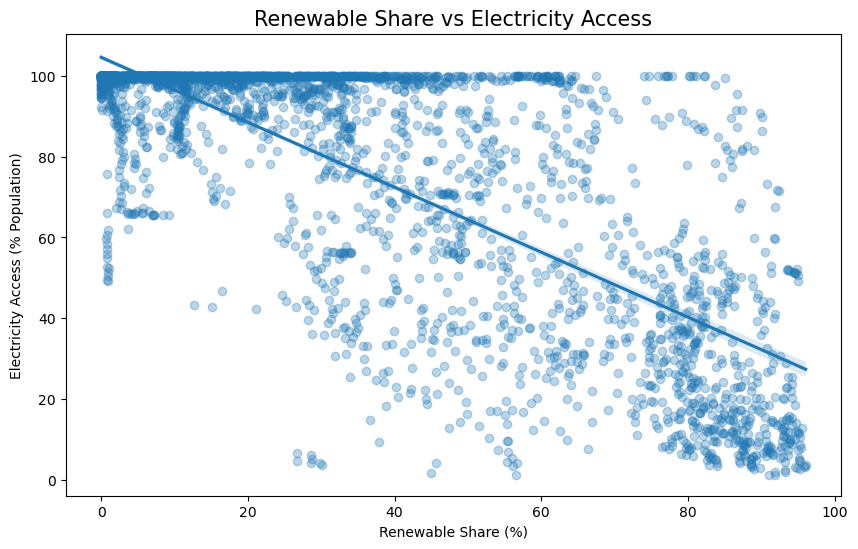

In [67]:
plt.figure(figsize=(10,6))
sns.regplot(x='Renewable energy share in the total final energy consumption (%)', y='Access to electricity (% of population)', data=df, scatter_kws={'alpha':0.3})
plt.title('Renewable Share vs Electricity Access', size=15)
plt.xlabel('Renewable Share (%)')
plt.ylabel('Electricity Access (% Population)')


In [68]:
electricity_global = df[['Entity','Year','Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)','Electricity from renewables (TWh)',]]
electricity_global.head(15)

,Entity,Year,Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh)
0,Afghanistan,2000,0.16,0.0,0.31
1,Afghanistan,2001,0.09,0.0,0.50
2,Afghanistan,2002,0.13,0.0,0.56
3,Afghanistan,2003,0.31,0.0,0.63
4,Afghanistan,2004,0.33,0.0,0.56
5,Afghanistan,2005,0.34,0.0,0.59
6,Afghanistan,2006,0.20,0.0,0.64
7,Afghanistan,2007,0.20,0.0,0.75
8,Afghanistan,2008,0.19,0.0,0.54
9,Afghanistan,2009,0.16,0.0,0.78


In [69]:
electricity_global_sum = electricity_global.groupby('Year').sum()
electricity_global_sum['Total Electricity'] = electricity_global_sum.sum(axis=1)
electricity_global_sum['% Fossil Fuel'] = (electricity_global_sum['Electricity from fossil fuels (TWh)']/electricity_global_sum['Total Electricity'])*100
electricity_global_sum['% Nuclear'] = (electricity_global_sum['Electricity from nuclear (TWh)']/electricity_global_sum['Total Electricity'])*100
electricity_global_sum['% Renewable'] = (electricity_global_sum['Electricity from renewables (TWh)']/electricity_global_sum['Total Electricity'])*100
electricity_global_sum.head()

,Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Total Electricity,% Fossil Fuel,% Nuclear,% Renewable
Year,,,,,,,
2000,8508.23,2242.95,2559.76,13310.94,63.919077,16.850425,19.230498
2001,8685.66,2306.33,2487.22,13479.21,64.437456,17.110276,18.452268
2002,9079.14,2315.05,2568.90,13963.09,65.022427,16.579783,18.397790
2003,9580.57,2274.46,2595.82,14450.85,66.297623,15.739282,17.963096
2004,9992.11,2381.59,2794.82,15168.52,65.873994,15.700873,18.425133


In [70]:
fig_electricity_global_volume = go.Figure()
fig_electricity_global_volume.add_trace(go.Scatter(x = electricity_global_sum.index, y = electricity_global_sum['Total Electricity'], name = 'Total Electricity', mode = 'lines+markers'))
fig_electricity_global_volume.add_trace(go.Scatter(x = electricity_global_sum.index, y = electricity_global_sum['Electricity from fossil fuels (TWh)'], name = ' Fossil Fuel', mode = 'lines+markers'))
fig_electricity_global_volume.add_trace(go.Scatter(x = electricity_global_sum.index, y = electricity_global_sum['Electricity from nuclear (TWh)'], name = 'Nuclear', mode = 'lines+markers'))
fig_electricity_global_volume.add_trace(go.Scatter(x = electricity_global_sum.index, y = electricity_global_sum['Electricity from renewables (TWh)'], name = 'Renewable', mode = 'lines+markers'))
fig_electricity_global_volume.update_layout( title = 'Electricity Production in the World', xaxis_tickfont_size = 7, template = 'plotly_dark')
fig_electricity_global_volume.update_xaxes(rangeslider_visible = True)
fig_electricity_global_volume.show()

In [71]:
electricity_global_sum.to_csv(r'C:\Users\Hieu Luu\Desktop\Project 4\project_4\Resources\total_electricity', index=True, header=True)

In [72]:
fig_electricity_global_portion = go.Figure()
fig_electricity_global_portion = fig_electricity_global_portion.add_trace(go.Bar(x = electricity_global_sum.index, y = electricity_global_sum['% Fossil Fuel'], name = 'Fossil Fuel'))
fig_electricity_global_portion = fig_electricity_global_portion.add_trace(go.Bar(x = electricity_global_sum.index, y = electricity_global_sum['% Nuclear'], name = 'Nuclear'))
fig_electricity_global_portion = fig_electricity_global_portion.add_trace(go.Bar(x = electricity_global_sum.index, y = electricity_global_sum['% Renewable'], name = 'Renewable'))
fig_electricity_global_portion = fig_electricity_global_portion.update_layout( title = 'Electricity Consumption Mix in the World', xaxis_tickfont_size = 7, template = 'plotly_dark', barmode = 'stack')
fig_electricity_global_portion.show()

In [73]:
electricity_global_country_sum= electricity_global[['Year','Entity','Electricity from fossil fuels (TWh)','Electricity from renewables (TWh)']]
electricity_global_country_sum.fillna(0,inplace=True)
electricity_global_country_sum['Total Electricity'] = electricity_global_country_sum['Electricity from fossil fuels (TWh)'] + electricity_global_country_sum['Electricity from renewables (TWh)']
electricity_global_country_sum.head()

,Year,Entity,Electricity from fossil fuels (TWh),Electricity from renewables (TWh),Total Electricity
0,2000,Afghanistan,0.16,0.31,0.47
1,2001,Afghanistan,0.09,0.50,0.59
2,2002,Afghanistan,0.13,0.56,0.69
3,2003,Afghanistan,0.31,0.63,0.94
4,2004,Afghanistan,0.33,0.56,0.89


In [76]:
def draw_graph(countries, column, data_frame):
    fig_electricity_global_country_volume = go.Figure()

    for country in countries:
        country_data = data_frame[data_frame['Entity'] == country]
        fig_electricity_global_country_volume.add_trace(go.Scatter(x=country_data['Year'], y=country_data[column], name=country, mode='lines+markers'))

    fig_electricity_global_country_volume.update_layout(title='Electricity Consumption in the World' + ' : ' + column, xaxis_title='Year', yaxis_title=column, template='plotly_dark')
    fig_electricity_global_country_volume.show()

In [77]:
country_list = ['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cayman Islands', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'French Guiana', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica',
       'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kuwait',
       'Kyrgyzstan', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya',
       'Lithuania', 'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia',
       'Maldives', 'Mali', 'Malta', 'Mauritania', 'Mauritius', 'Mexico',
       'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Myanmar',
       'Namibia', 'Nauru', 'Nepal', 'Netherlands', 'New Caledonia',
       'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'North Macedonia',
       'Norway', 'Oman', 'Pakistan', 'Panama', 'Papua New Guinea',
       'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal',
       'Puerto Rico', 'Qatar', 'Romania', 'Rwanda',
       'Saint Kitts and Nevis', 'Saint Lucia',
       'Saint Vincent and the Grenadines', 'Samoa',
       'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia',
       'Seychelles', 'Sierra Leone', 'Singapore', 'Slovakia', 'Slovenia',
       'Solomon Islands', 'Somalia', 'South Africa', 'South Sudan',
       'Spain', 'Sri Lanka', 'Sudan', 'Suriname', 'Sweden', 'Switzerland',
       'Tajikistan', 'Thailand', 'Togo', 'Tonga', 'Trinidad and Tobago',
       'Tunisia', 'Turkey', 'Turkmenistan', 'Tuvalu', 'Uganda', 'Ukraine',
       'United Arab Emirates', 'United Kingdom', 'United States',
       'Uruguay', 'Uzbekistan', 'Vanuatu', 'Yemen', 'Zambia', 'Zimbabwe']  # Replace with actual country names
draw_graph(country_list, 'Total Electricity', electricity_global_country_sum)

In [79]:
electricity_global_country_sum.to_csv(r'C:\Users\Hieu Luu\Desktop\Project 4\project_4\Resources\total_country_electricity', index=False, header=True)